# Data Preprocessing 
Import necessary libraries and load json files collected from the PageViews API

In [100]:
import json
import pandas as pd

with open('academy_monthly_desktop_201507-202310.json') as f:
    desktop_records = json.load(f)
    
with open('academy_monthly_mobile_201507-202310.json') as f:
    mobile_records = json.load(f)

Flatten all records from different titles into a single list. The output will be one list with all records for all titles as opposed to records with titles as keys. This process is essential in converting JSON files into Pandas DataFrames, which will make downstream processing easier

In [101]:
flattened_desktop_records = [x for sub in desktop_records.values() for x in sub]
flattened_mobile_records = [x for sub in mobile_records.values() for x in sub]

Annotate access to label desktop and mobile data, and cleanup the artile names

In [102]:
df_desktop = pd.DataFrame(flattened_desktop_records)
df_desktop['access'] = 'desktop'
df_desktop['article'] = df_desktop.article.str.replace('_', ' ')

df_mobile = pd.DataFrame(flattened_mobile_records)
df_mobile['access'] = 'mobile'
df_mobile['article'] = df_mobile.article.str.replace('_', ' ')

Calculate minimum and maximum mean views for each version of the data: desktop and mobile.
This is done by grouping articles together, taking the mean per article and then checking for the minimum/maximum values by sorting the resulting data

In [103]:
# Check the min and max mean views
df_views_mean_desktop = df_desktop[['article', 'views']].groupby('article').mean().sort_values(by='views').reset_index()

print('Title with min average views on desktop: ', df_views_mean_desktop.iloc[0].article)
print('Title with max average views on desktop: ', df_views_mean_desktop.iloc[-1].article)

# Check the min and max mean views
df_views_mean_mobile = df_mobile[['article', 'views']].groupby('article').mean().sort_values(by='views').reset_index()
print('\n')
print('Title with min average views on mobile: ', df_views_mean_mobile.iloc[0].article)
print('Title with max average views on mobile: ', df_views_mean_mobile.iloc[-1].article)

Title with min average views on desktop:  Project Hope (film)
Title with max average views on desktop:  Joker (2019 film)


Title with min average views on mobile:  Project Hope (film)
Title with max average views on mobile:  The Whale (2022 film)


# Visualisation and Analysis

## Maximum and Minimum Average

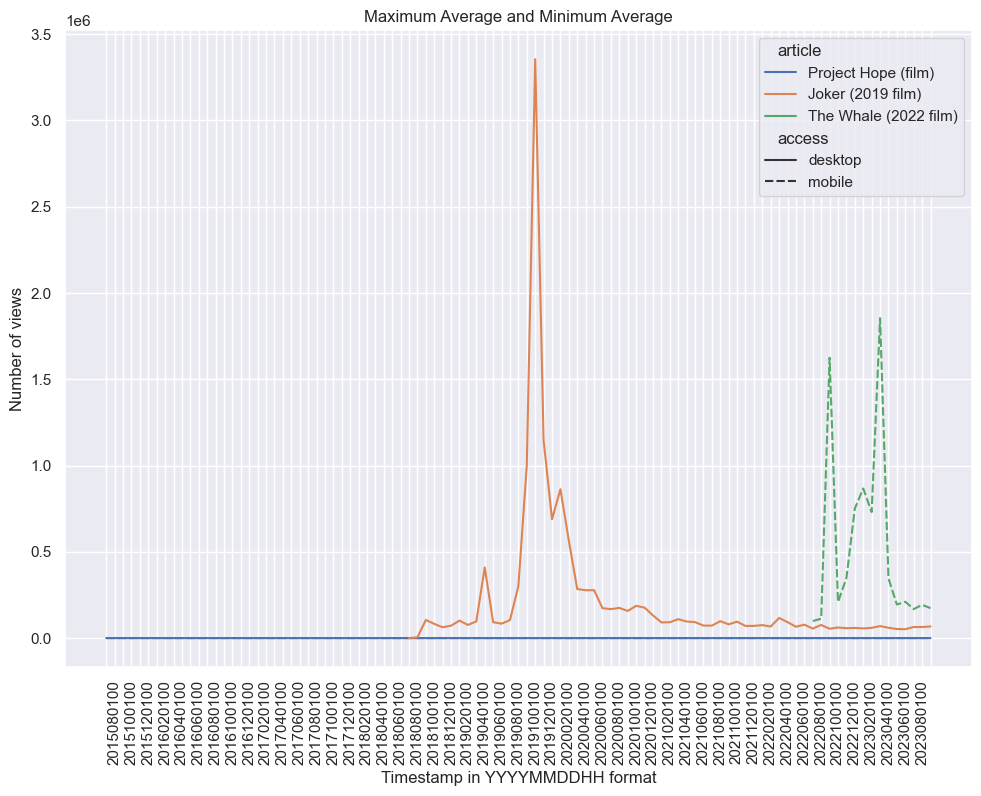

In [190]:
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

desktop_plot = df_desktop[df_desktop.article.isin(df_views_mean_desktop[::len(df_views_mean_desktop)-1].article)]
mobile_plot = df_mobile[df_mobile.article.isin(df_views_mean_mobile[::len(df_views_mean_mobile)-1].article)]

df_plot = pd.concat([desktop_plot, mobile_plot])

sns.set(rc={'figure.figsize':(11.7,8.27)})


ax = sns.lineplot(data=df_plot.sort_values(by='timestamp'),
                  x="timestamp", 
                  y="views", 
                  hue="article", 
                  style='access')
ax.set(xlabel='Timestamp in YYYYMMDDHH format', ylabel='Number of views', title='Maximum Average and Minimum Average')
plt.setp(ax.get_xticklabels()[::2], visible=False)

plt.savefig('Maximum Average and Minimum Average.png')
plt.xticks(rotation=90)
plt.show()


> Note that 'Project Whale' is the least searched for movie, on both Desktop and Mobile views

## Top 10 Views

Find top 10 most viewed pages for each desktop and mobile

In [195]:
top_10_desktop = df_desktop[['article', 'views', 'access', 'timestamp']].sort_values('views', ascending=False).drop_duplicates('article')[:10].article
top_10_mobile = df_mobile[['article', 'views', 'access', 'timestamp']].sort_values('views', ascending=False).drop_duplicates('article')[:10].article

In [196]:
df_desktop_top = df_desktop[df_desktop.article.isin(top_10_desktop)]
df_mobile_top = df_mobile[df_mobile.article.isin(top_10_mobile)]

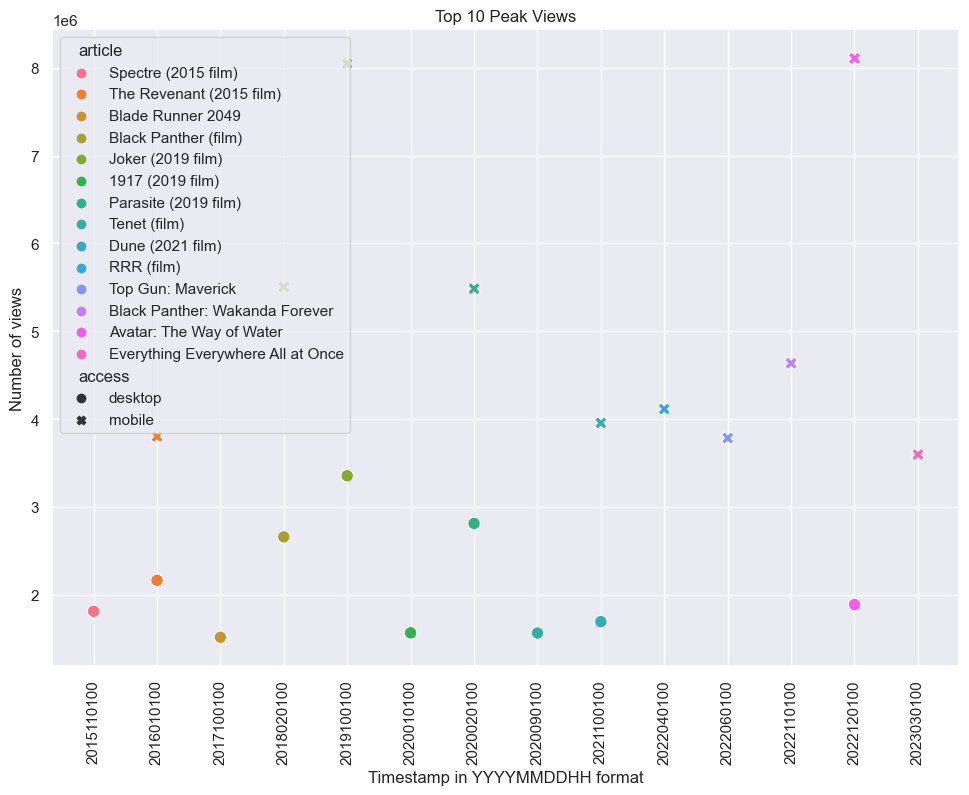

In [191]:
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt


df_plot = pd.concat([
        df_desktop_top, df_mobile_top
])
sns.set(rc={'figure.figsize':(11.7,8.27)})


ax = sns.scatterplot(data=df_plot.sort_values(by='timestamp'),
                  x="timestamp", 
                  y="views", 
                  hue="article", 
                  style='access', s=80)
ax.set(xlabel='Timestamp in YYYYMMDDHH format', ylabel='Number of views', title='Top 10 Peak Views')

plt.savefig('Top 10 Peak Views.png')
plt.xticks(rotation=90)
plt.show()

## Fewest Months of Data

In [156]:
least_desktop_articles = df_desktop[['article', 'views']].groupby('article').count().sort_values(by='views')[:10].reset_index().article
least_mobile_articles = df_mobile[['article', 'views']].groupby('article').count().sort_values(by='views')[:10].reset_index().article

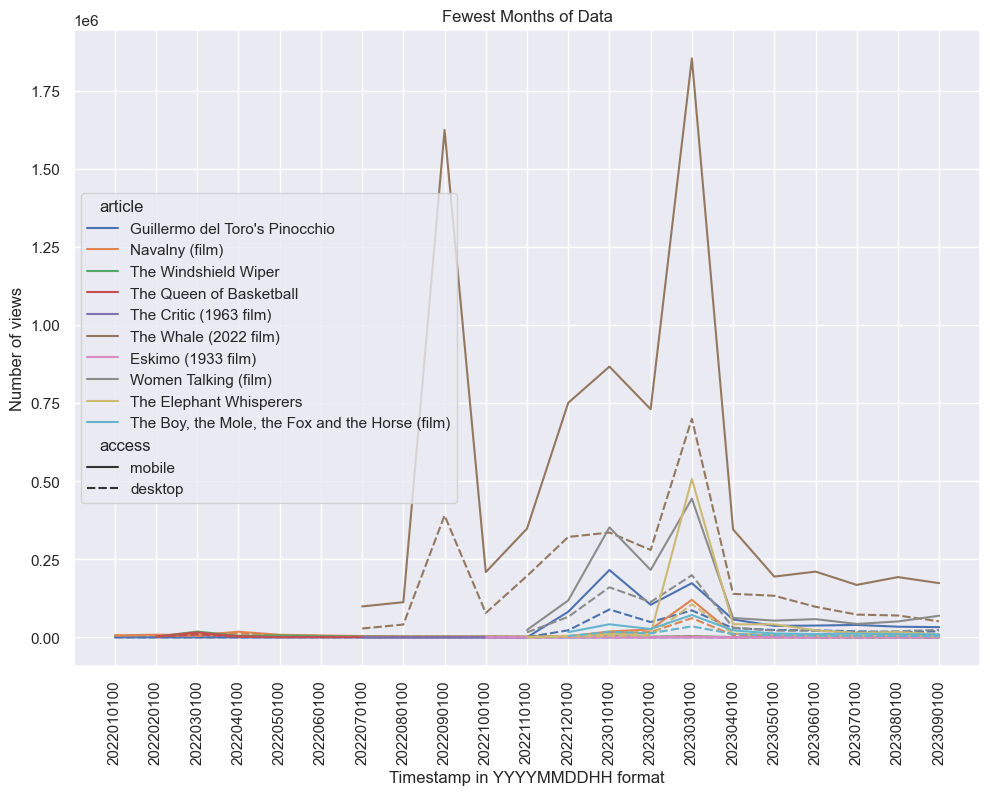

In [192]:
df_plot = pd.concat(
    [
    df_desktop[df_desktop.article.isin(least_desktop_articles)],
    df_mobile[df_mobile.article.isin(least_mobile_articles)]
    ]
)

sns.set(rc={'figure.figsize':(11.7,8.27)})


ax = sns.lineplot(data=df_plot.sort_values(by='timestamp'),
                  x="timestamp", 
                  y="views", 
                  hue="article", 
                  style='access')
ax.set(xlabel='Timestamp in YYYYMMDDHH format', ylabel='Number of views', title='Fewest Months of Data')
# plt.setp(ax.get_xticklabels()[::2], visible=False)
plt.savefig('Fewest Months of Data.png')
plt.xticks(rotation=90)
plt.show()